In [2]:
# data=> Social_Network_Ads

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [8]:
df.shape

(400, 5)

In [10]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [12]:
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


#### feature scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
x_scaled = sca.fit_transform(x)

#### cross validation

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state= 0)

#### build the model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors= 4)  
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### Evaluate

In [28]:
y_pred = knn.predict(x_test)

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [32]:
accuracy_score(y_test, y_pred)

0.92

In [34]:
np.mean(y_test != y_pred)

0.08

#### Choosing K-Value

In [37]:
error = []

for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error.append(np.mean(y_test != y_pred))

In [39]:
error

[0.11,
 0.1,
 0.07,
 0.08,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.08,
 0.08,
 0.08,
 0.08,
 0.09,
 0.08,
 0.09,
 0.08,
 0.08,
 0.08,
 0.09,
 0.08,
 0.09,
 0.08,
 0.1,
 0.09,
 0.1,
 0.1,
 0.1,
 0.1,
 0.11,
 0.1,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.11,
 0.12,
 0.12,
 0.12,
 0.11,
 0.12,
 0.12,
 0.11,
 0.11,
 0.11,
 0.11,
 0.12,
 0.12,
 0.12,
 0.12,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.13,
 0.14,
 0.13,
 0.13,
 0.13,
 0.15,
 0.14,
 0.15,
 0.15,
 0.15]

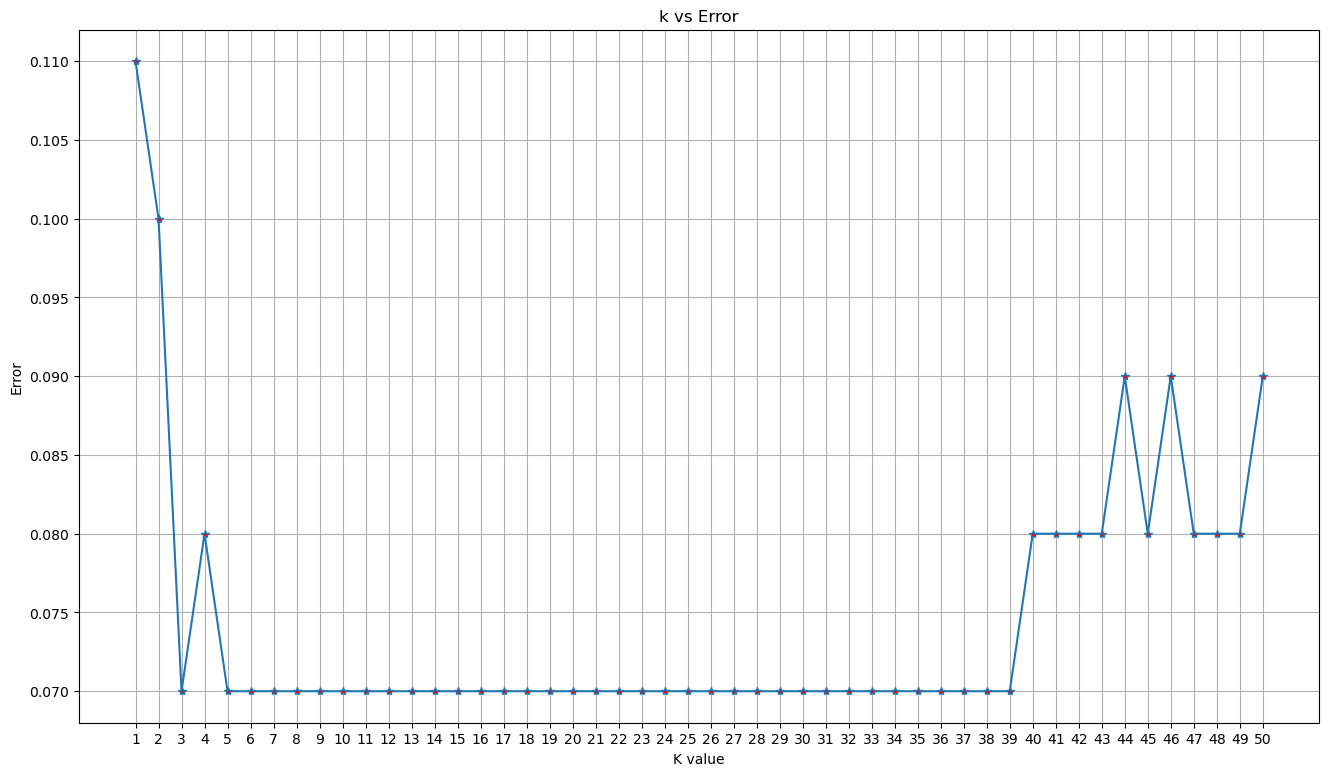

In [47]:
plt.figure(figsize=(16,9))

plt.title('k vs Error')
plt.xlabel('K value')
plt.ylabel('Error')
plt.xticks(range(1,51,1))
plt.plot(range(1, 51), error[:50], marker = '*', mfc = 'red')
plt.grid();

In [49]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

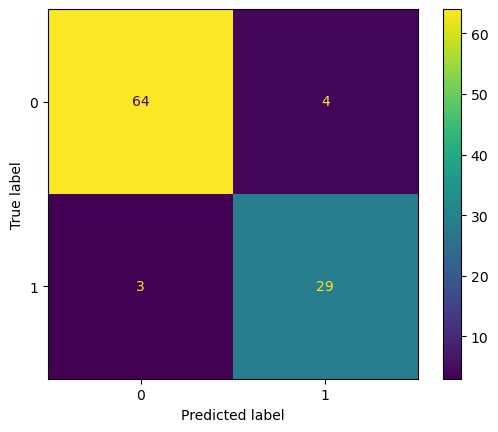

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);